In [1]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df_iris = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','class label'])

In [2]:
df_iris.head(5)

,sepal length,sepal width,petal length,petal width,class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Since PCA is affected by the scale of the variables, we normalize the data in the first step (mean=0, variance=1).

In [3]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

X = df_iris.loc[:, features].values

Y = df_iris.loc[:,['class label']].values

stdX = StandardScaler().fit_transform(X)

And then you can finally map the 4-dimensional data set into 2 dimensions with the help of PCA.

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(stdX)

In [5]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Component 1', 'Component 2'])
df_iris_2dim = pd.concat([principalDf, df_iris[['class label']]], axis = 1)

print(df_iris_2dim[:5])

   Component 1  Component 2  class label
0    -2.264542     0.505704  Iris-setosa
1    -2.086426    -0.655405  Iris-setosa
2    -2.367950    -0.318477  Iris-setosa
3    -2.304197    -0.575368  Iris-setosa
4    -2.388777     0.674767  Iris-setosa


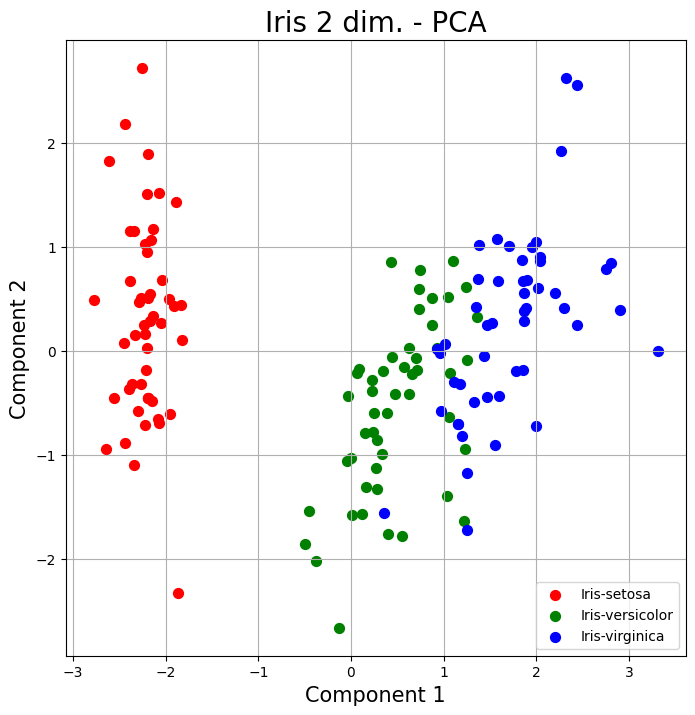

In [6]:
#vizualization
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('Iris 2 dim. - PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df_iris_2dim['class label'] == target
    ax.scatter(df_iris_2dim.loc[indicesToKeep, 'Component 1']
               , df_iris_2dim.loc[indicesToKeep, 'Component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

MDS
```
# This is formatted as code
```



In [8]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, n_init=10)
embeddedX = mds.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


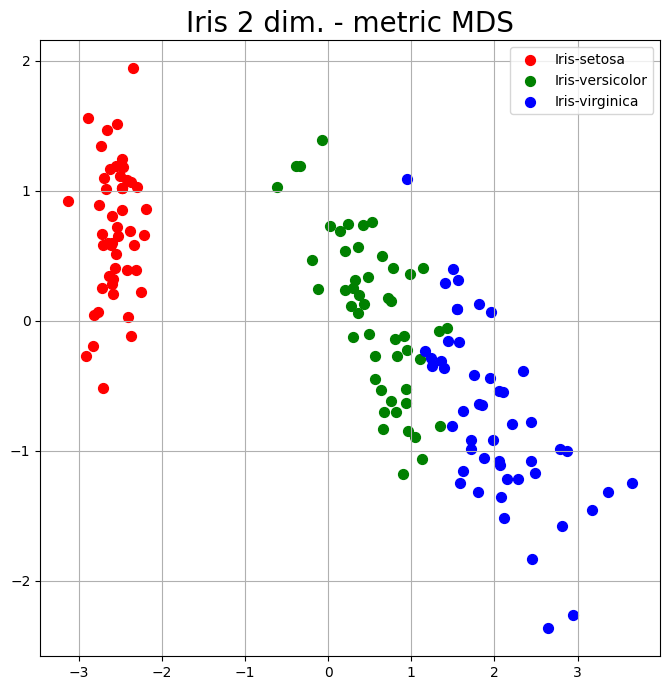

In [9]:
#vizualization
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_title('Iris 2 dim. - metric MDS', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    ax.scatter(embeddedX[Y[:,0] == target, 0]
               , embeddedX[Y[:,0] == target, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Non-metric MDS

In [10]:
mds = MDS(n_components=2, metric=False, n_init=10)
embeddedXnonmetric = mds.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


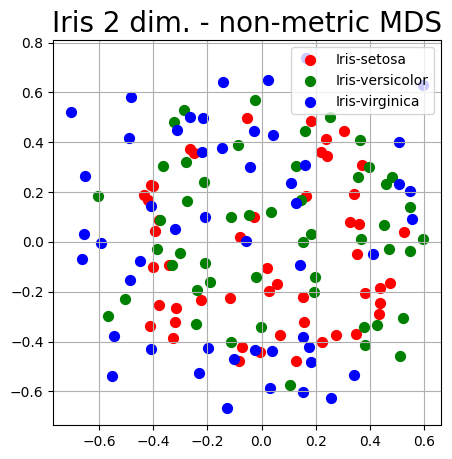

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Iris 2 dim. - non-metric MDS', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    ax.scatter(embeddedXnonmetric[Y[:,0] == target, 0]
               , embeddedXnonmetric[Y[:,0] == target, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Mapping iris data into 2 dimensions with t-SNE

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=5, n_iter=1000)
embeddedXtsne = tsne.fit_transform(X)

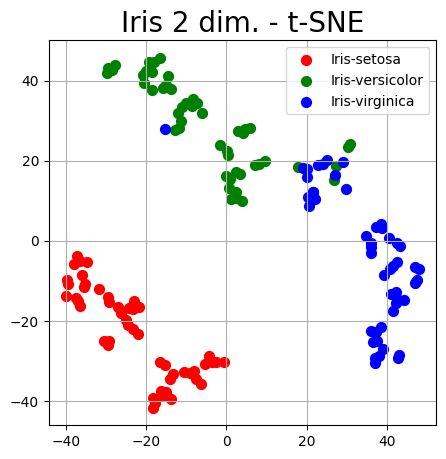

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Iris 2 dim. - t-SNE', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    ax.scatter(embeddedXtsne[Y[:,0] == target, 0]
               , embeddedXtsne[Y[:,0] == target, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

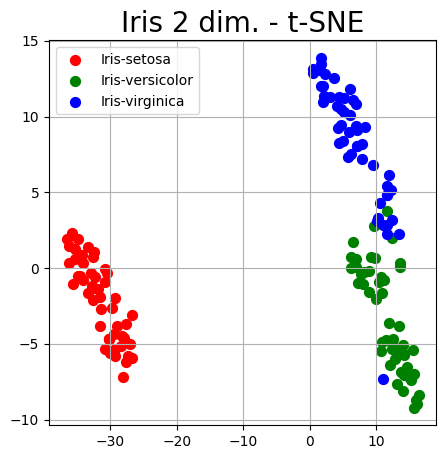

In [14]:
#Let's test the method by considering more neighbors!
tsne = TSNE(n_components=2, perplexity=20, n_iter=1000)
embeddedXtsne = tsne.fit_transform(X)


fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Iris 2 dim. - t-SNE', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    ax.scatter(embeddedXtsne[Y[:,0] == target, 0]
               , embeddedXtsne[Y[:,0] == target, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Handwriting mapping - with PCA
The MNIST dataset is a dataset containing 70,000 handwritten digits. Each handwriting (1 digit) is stored as a 28x28 image, which corresponds to a 1x784 dimensional vector in the dataset. The dimensionality of the data set is therefore 784. Let's map this 784-dimensional data set into 2 dimensions using PCA!

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold, datasets, decomposition, discriminant_analysis

digits = datasets.load_digits()
X = digits.data
y = digits.target
n_samples, n_features = X.shape

def embedding_plot(X, title):
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(24, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=y/10.)

    shown_images = np.array([[1., 1.]])
    for i in range(X.shape[0]):
        if np.min(np.sum((X[i] - shown_images) ** 2, axis=1)) < 1e-2: continue
        shown_images = np.r_[shown_images, [X[i]]]
        ax.add_artist(offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]))

    plt.xticks([]), plt.yticks([])
    plt.title(title)

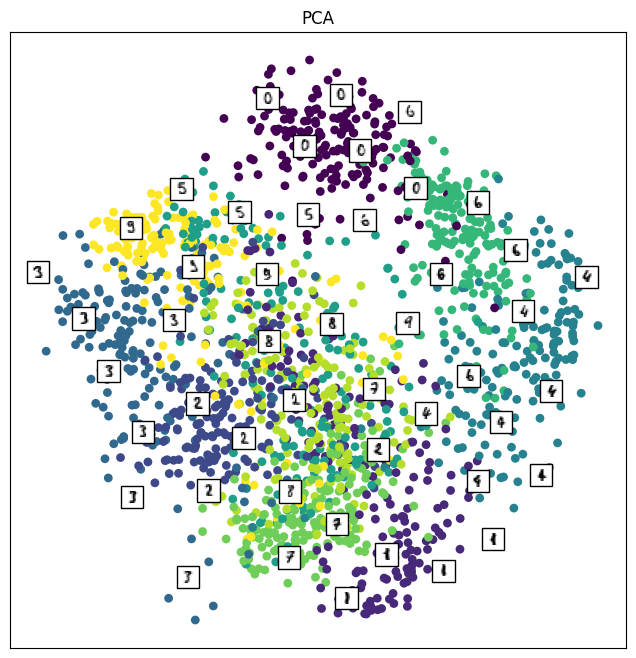

In [16]:
X_pca = decomposition.PCA(n_components=2).fit_transform(X)

embedding_plot(X_pca, "PCA")
plt.show()